<a href="https://colab.research.google.com/github/BBelachkar/Big_Data/blob/main/TP_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Chapitre 3 : Application du Prompt Engineering avec PySpark

## Objectif du TP
Ce TP vise à explorer le "Prompt engineering" appliqué au traitement des données avec PySpark. Nous allons travailler sur un ensemble de données immobilières (format .txt), l'idée étant d'utiliser les différentes types de prompt engineering vue en cours pour comprendre, générer, modifier, et corriger des codes.

Lien pour accéder aux données : https://drive.google.com/drive/folders/1E2araQIJOddqSVWm1cymHWezHAbK8-dq?usp=drive_link


**Ce TP provient du cours de Data Engineering dispensé par Mr. Benoit FRANK à l'Ecole Centrale de Casablanca pour l'année académique 2023/2024.**

## Packages  


In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=276d400dfe64c83d75747c3166bd59e7d9f0a7083dd1249158e82167389a9c28
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
!pyspark --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.5.0
      /_/
                        
Using Scala version 2.12.18, OpenJDK 64-Bit Server VM, 11.0.21
Branch HEAD
Compiled by user ubuntu on 2023-09-09T01:53:20Z
Revision ce5ddad990373636e94071e7cef2f31021add07b
Url https://github.com/apache/spark
Type --help for more information.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, year, when
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.functions import col, year
from pyspark.sql.functions import regexp_replace

## Création d'une session spark, importation et transformation des données

Commencez par créer une session Spark

In [15]:
# Création d'une session SparkDVF


Lecture des données

In [17]:
MyFirstDF = SparkDVF.read.csv("/content/drive/MyDrive/Datalake/01_RawData/valeursfoncieres*.txt", header=True,sep="|")
MyFirstDF.count()

16426333

In [18]:
MyFirstDF.show()

+-----------------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+---------------+---------------+-------+-----+------------+---------+---------------+-----------+--------------------+----------------+------------+------------------+-------+-------+---------+-------+-------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------------+---------------+-----------+-----------------+-------------------+-------------------------+--------------+-----------------------+---------------+
|Identifiant de document|Reference document|1 Articles CGI|2 Articles CGI|3 Articles CGI|4 Articles CGI|5 Articles CGI|No disposition|Date mutation|Nature mutation|Valeur fonciere|No voie|B/T/Q|Type de voie|Code voie|           Voie|Code postal|             Commune|Code departement|Code commune|Prefixe de section|Sec

La conversion de la DataFrame en format Parquet a plusieurs avantages :

1. **Compression et Stockage optimisés :** Le format Parquet est conçu pour offrir une compression élevée des données, ce qui permet de réduire l'espace de stockage nécessaire. Par conséquent, si vous avez une grande quantité de données, le passage au format Parquet peut aider à économiser de l'espace disque.

2. **Performance des requêtes :** Parquet est un format de stockage colonnaire, ce qui signifie qu'il stocke les données de manière à regrouper les valeurs similaires ensemble. Cela améliore les performances des requêtes, car il est plus efficace pour lire des colonnes spécifiques plutôt que des lignes entières.

3. **Traitement Distribué :** Lorsque vous travaillez avec des outils de traitement distribué tels que Apache Spark, le format Parquet est souvent recommandé car il prend en charge le traitement distribué et parallèle des données, ce qui peut améliorer les performances globales.

4. **Schéma Evolutif :** Parquet stocke également les métadonnées du schéma, ce qui signifie que les changements de schéma peuvent être plus faciles à gérer. Si votre structure de données évolue au fil du temps, Parquet peut être plus flexible.

5. **Interoperabilité :** Le format Parquet est largement utilisé dans l'écosystème Hadoop et est pris en charge par de nombreux outils de traitement de données. Cela peut faciliter l'interopérabilité entre différents composants de votre pipeline de données.


Sauvegarde de la DataFrame au format Parquet

In [32]:
# Ecrire le code pour sauvegarder la DataFrame "MyFirstDF" au format Parquet


In [1]:
# Lire la DataFrame .parquet puis verifier le nombre des enregistrements (Elle sera nommée df par la suite)


Affichage des 20 premières lignes de manière lisible

In [34]:
# Afficher les premières lignes de manière lisible


+-----------------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+---------------+---------------+-------+-----+------------+---------+--------------------+-----------+----------------+----------------+------------+------------------+-------+-------+---------+-------+-------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------------+---------------+--------------------+-----------------+-------------------+-------------------------+--------------+-----------------------+---------------+
|Identifiant de document|Reference document|1 Articles CGI|2 Articles CGI|3 Articles CGI|4 Articles CGI|5 Articles CGI|No disposition|Date mutation|Nature mutation|Valeur fonciere|No voie|B/T/Q|Type de voie|Code voie|                Voie|Code postal|         Commune|Code departement|Code commune|Prefixe de 

In [7]:
# Convertir la colonne "Date mutation" en format date
df = df.withColumn("Date mutation", F.to_date(df["Date mutation"], "dd/MM/yyyy"))

In [11]:
# Ajout de la colonne 'Annee' en extrayant l'année à partir de la colonne 'Date mutation'
df = df.withColumn('Annee', year(col('Date mutation')))

## la variation du nombre de vente par département et par an

Expliquer le code suivant et interpreter les resultats obtenus

+----------------+-----+-----+
|Code departement|Annee|count|
+----------------+-----+-----+
|              01| 2019|42461|
|              01| 2020|39369|
|              01| 2021|53792|
|              01| 2022|50804|
|              02| 2019|26935|
|              02| 2020|25827|
|              02| 2021|36477|
|              02| 2022|35193|
|              03| 2019|22727|
|              03| 2020|22037|
|              03| 2021|33199|
|              03| 2022|33569|
|              04| 2019|11342|
|              04| 2020|10189|
|              04| 2021|16177|
|              04| 2022|16715|
|              05| 2019|13583|
|              05| 2020|13615|
|              05| 2021|18936|
|              05| 2022|19094|
+----------------+-----+-----+
only showing top 20 rows



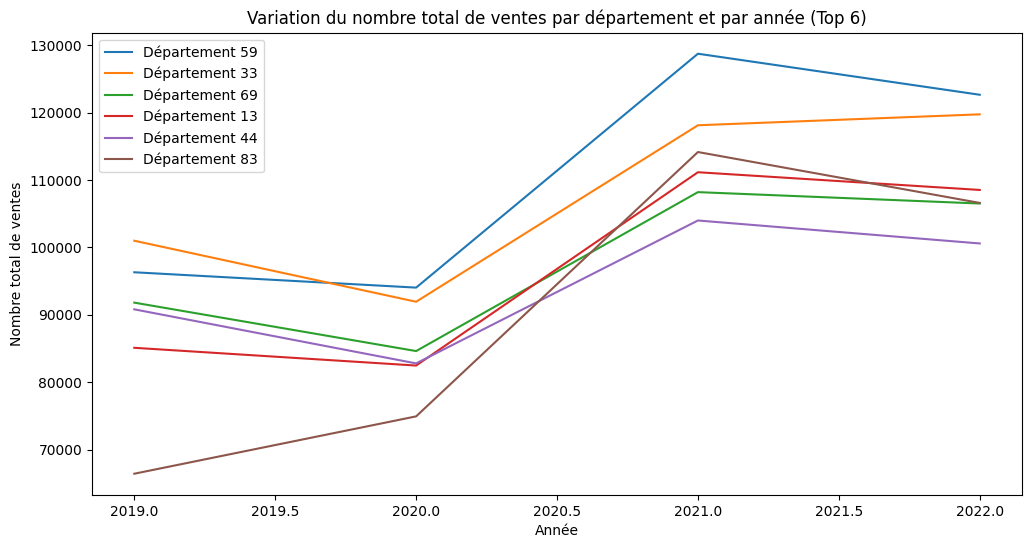

In [49]:
# Calcul du nombre total de ventes par département et par année
ventes_par_dept_annee = df.groupBy('Code departement', 'Annee').count().orderBy('Code departement', 'Annee')

# Affichage du résultat
ventes_par_dept_annee.show()

# Visualisation des 6 departements avec le plus grand nombre de vente par un diagramme linéaire
departements = ventes_par_dept_annee.groupBy('Code departement').sum('count').orderBy('sum(count)', ascending=False).limit(6).select('Code departement').rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(12, 6))

for departement in departements:
    departement_data = ventes_par_dept_annee.filter(col('Code departement') == departement).toPandas()
    plt.plot(departement_data['Annee'], departement_data['count'], label=f'Département {departement}')

plt.title('Variation du nombre total de ventes par département et par année (Top 6)')
plt.xlabel('Année')
plt.ylabel('Nombre total de ventes')
plt.legend()
plt.show()

**Limitation :** Cette représentation est limitée car avec plus de 50 départements, il devient impraticable de visualiser tous les départements dans un seul graphe.

**Optimisation :** Pour une représentation plus optimale, vous pouvez envisager de regrouper les nombres de ventes par région, en exploitant le fichier CSV disponible sur le site https://www.data.gouv.fr/fr/datasets/departements-de-france/. Cette approche permettrait de simplifier la visualisation en agrégeant les données au niveau régional plutôt que départemental.

In [9]:
# Importation des données de regions


In [55]:
data_regions.show()

+----------------+--------------------+-----------+--------------------+
|code_departement|     nom_departement|code_region|          nom_region|
+----------------+--------------------+-----------+--------------------+
|              01|                 Ain|         84|Auvergne-Rhône-Alpes|
|              02|               Aisne|         32|     Hauts-de-France|
|              03|              Allier|         84|Auvergne-Rhône-Alpes|
|              04|Alpes-de-Haute-Pr...|         93|Provence-Alpes-Cô...|
|              05|        Hautes-Alpes|         93|Provence-Alpes-Cô...|
|              06|     Alpes-Maritimes|         93|Provence-Alpes-Cô...|
|              07|             Ardèche|         84|Auvergne-Rhône-Alpes|
|              08|            Ardennes|         44|           Grand Est|
|              09|              Ariège|         76|           Occitanie|
|              10|                Aube|         44|           Grand Est|
|              11|                Aude|         76|

Corrigez et complètez le code suivant, pour regrouper les nombres de ventes par région

+-----------+-------------+-----+------+
|code_region|   nom_region|Annee| count|
+-----------+-------------+-----+------+
|          1|   Guadeloupe| 2019|  6676|
|          1|   Guadeloupe| 2020|  6078|
|          1|   Guadeloupe| 2021|  7650|
|          1|   Guadeloupe| 2022|  7977|
|          2|   Martinique| 2019|  7316|
|          2|   Martinique| 2020|  6057|
|          2|   Martinique| 2021|  8017|
|          2|   Martinique| 2022|  8036|
|          3|       Guyane| 2019|  3242|
|          3|       Guyane| 2020|  3384|
|          3|       Guyane| 2021|  4931|
|          3|       Guyane| 2022|  5586|
|          4|   La Réunion| 2019| 19168|
|          4|   La Réunion| 2020| 21848|
|          4|   La Réunion| 2021| 23799|
|          4|   La Réunion| 2022| 23375|
|         11|Île-de-France| 2019|490328|
|         11|Île-de-France| 2020|437441|
|         11|Île-de-France| 2021|542647|
|         11|Île-de-France| 2022|557223|
+-----------+-------------+-----+------+
only showing top

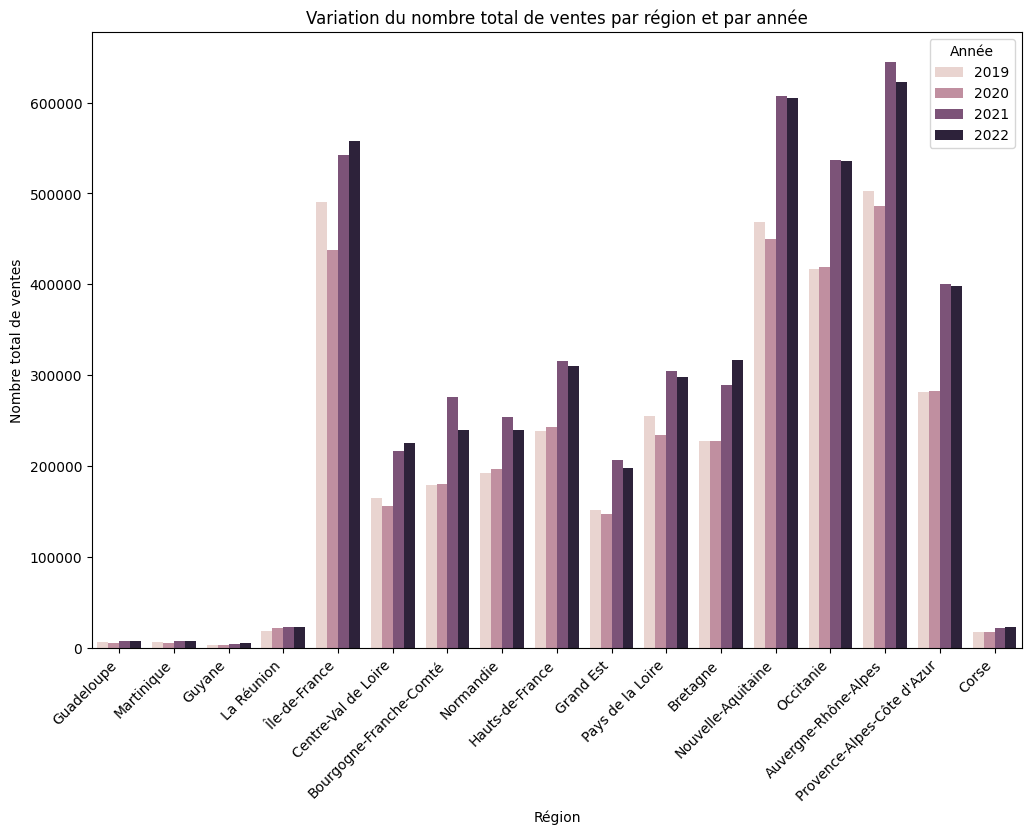

In [62]:
# Corriger le code de jointure entre le DataFrame des ventes et celui des données géographiques
df_regions = df.join(data_regions, df['Code departement'] = data_regions['code_departement'])

# Calculer du nombre total de ventes par région et par année
ventes_par_region_annee = df_regions.groupBy('code_region', 'nom_region', 'Annee').count().orderBy('code_region', 'Annee')

# Conversion du DataFrame en Pandas pour utiliser Seaborn


# Utiliser Seaborn pour tracer un graphique en barres

## Répartition des valeurs foncières pour les maisons et les appartements sur la période allant de 2019 à 2022





Voici un exemple pour executer une requete SQL avec PySpark :

SparkDVF.sql("""SELECT MIN(`Valeur fonciere`)

FROM df

WHERE `Valeur fonciere` IS NOT NULL""").show()

**Explorez la colonne "Valeur fonciere".**

**Objectif :** Éliminer les valeurs aberrantes susceptibles d'influencer les calculs et de fausser l'analyse.

**Résultats attendues :** Détermination d'une valeur maximale approximative de 25 millions et d'une valeur minimale d'environ 10 000.
Ces nouvelles bornes seront utilisées pour assurer la précision des analyses ultérieures de ce TP.

In [ ]:
# MIN / MAX / AVG / STDDEV


In [ ]:
# La requête SQL doit sélectionner les données suivantes de la table des données :
# La date de mutation
# Le type de local
# La valeur foncière
# Utiliser la clause `where` pour filtrer les résultats sur les critères suivants :
# Le type de local doit être égal à `Maison` ou `Appartement`
# La date de mutation ne doit pas être NULL
# La valeur foncière doit être comprise entre 10 000 et 2 500 000

requete = """ Code SQL demandé dans les commentaires """
# Renvoie des résultats à la console

r3 = SparkDVF.sql(requete)
r3.show()


Ecrivez le code pour voir la répartition des valeurs foncières pour les maisons et les appartements de 2019 a 2022

**Lignes directives :** Un Strip plot, une boite à moustache, distribution.

In [ ]:
# Votre Code ici


## Distribution des surfaces de maisons entre 2019 et 2022

**Lignes directives :** Filtrer les données par type de maison. Pour chaque année, examiner la répartition des surfaces des maisons en représentant la moyenne, l'écart type et les quartiles. Ensuite, pour une visualisation plus explicite, créer un histogramme illustrant la fréquence des observations en fonction de la superficie.

In [ ]:
# Ecrire votre code ici


 ## Top 50 villes ayant enregistré le plus grand nombre de ventes en 2021

Expliquer le code suivant ligne par ligne et interprèter les résultats obtenus

In [35]:
# Filtrer l'année 2021
new_df_filtered = MySecondDF.filter((F.year(MySecondDF["Date mutation"]) >= 2021) & (F.year(MySecondDF["Date mutation"]) < 2022))

result = new_df_filtered.groupBy("Commune") \
                        .agg(F.count(F.when(new_df_filtered["Nature mutation"] == "Vente", 1)).alias("Nombre total de ventes"))

# Classer les résultats par ordre décroissant du nombre total de ventes
result = result.orderBy(F.desc("Nombre total de ventes"))

# Afficher les résultats
result.show(50)

+--------------------+----------------------+
|             Commune|Nombre total de ventes|
+--------------------+----------------------+
|            TOULOUSE|                 26408|
|                NICE|                 20674|
|            BESANCON|                 20013|
|              NANTES|                 15735|
|         MONTPELLIER|                 15349|
|       SAINT-ETIENNE|                 14461|
|            BORDEAUX|                 13322|
|               DIJON|                 12206|
|    LA SEYNE SUR MER|                 12069|
|               LILLE|                 11611|
|              RENNES|                 10431|
|               NIMES|                  9401|
|            GRENOBLE|                  9122|
|              CANNES|                  9101|
|            PARIS 15|                  8739|
|              TOULON|                  8709|
|             LE MANS|                  8498|
|               REIMS|                  8482|
|               BREST|            

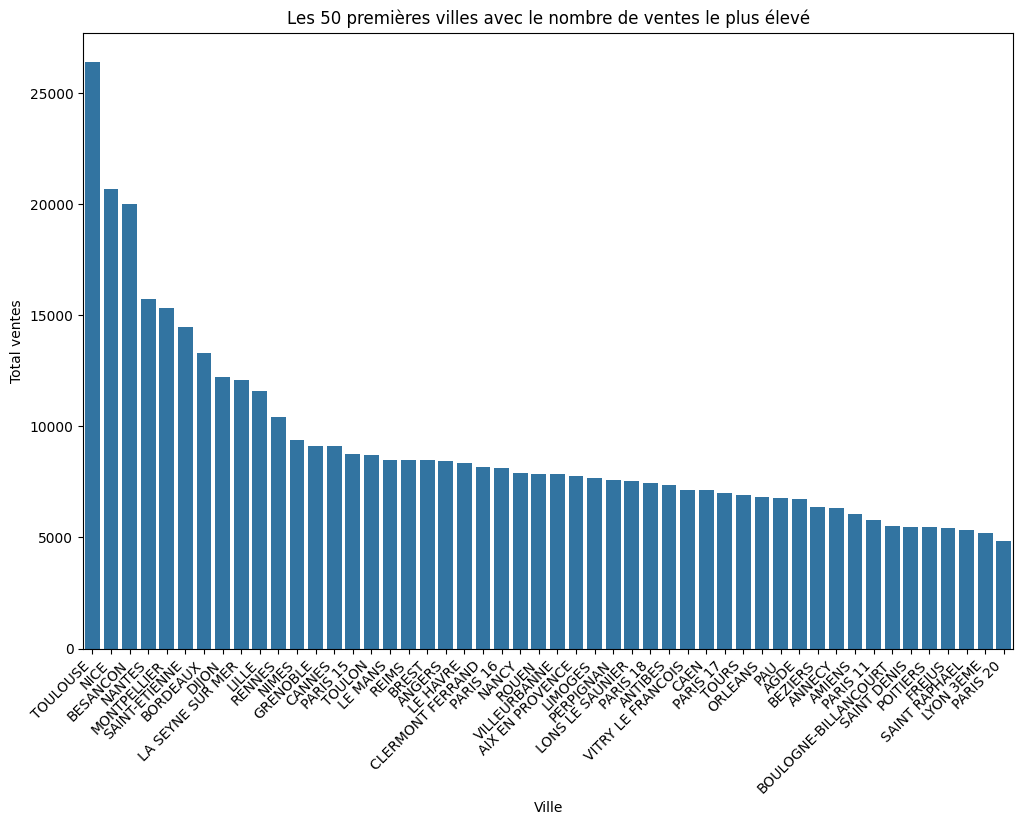

In [36]:
# Conversion to pandas
result_pandas = result.limit(50).toPandas()

# Utiliser Seaborn pour tracer un graphique en barres
plt.figure(figsize=(12, 8))
sns.barplot(data=result_pandas, x='Commune', y='Nombre total de ventes')
plt.title('Les 50 premières villes avec le nombre de ventes le plus élevé')
plt.xlabel('Ville')
plt.ylabel('Total ventes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Évolution de la surface vendue de type bois entre 2019 et 2022.

Corrigez puis complétez le code suivant :

In [ ]:
# Filtrage des données pour les biens de type 'Bois' entre 2019 et 2022
df_bois = df.filter(col('Nature culture') == 'Bois')

# Calcul de la surface totale vendue par année
surface_par_annee = df_bois.groupBy('Annee').agg({'Surface terrain': 'sum'}).orderBy('Annee')

# Conversion du DataFrame en Pandas pour la visualisation

# Création du diagramme en barres avec Matplotlib
